In [116]:
import xarray as xr
import Calculation.trend_func as trends
import Plot.plotfunctions as pltfun
import matplotlib.pyplot as plt
import Calculation.heat_wave_indetification as hwi
import Calculation.mask_creation as mc
import pandas as pd
import cartopy.crs as ccrs
import cartopy as cart

homefolder = '/home/nniebaum/data_nils'
datafolder = '/data/user/nniebaum'
populationfolder = datafolder + '/gpw-v4/'
plotfolder = '/home/nniebaum/bachlor-thesis-code/Plots/'
areafolder = plotfolder + "Area/"

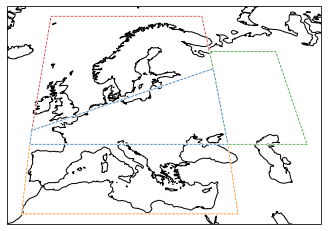

In [135]:
# data = xr.open_dataset(datafolder + '/europe_full_daymax_masks_population_1900-01-01_2010-12-31.nc')
# # # data_false = xr.open_dataset(datafolder + '/FALSE_SWBGT_europe_daymax_masks_population_1900-01-01_2010-12-31.nc')
cdo_ydrunpctl = xr.open_dataset(datafolder + '/cdo_ydrun_1961-01-01_1990-12-31/cdo_ydrunpctl_file_98pctl_31days.nc')

# t2m_mask_ydrunpctl = data['t2m_mask_ydrunpctl']
data = xr.open_dataset(datafolder + '/New2_europe_full_daymax_masks_population_1900-01-01_2010-12-31.nc')
data


def plot_all_regions(ax,colors = ['tab:red','tab:green','tab:orange','tab:blue'], 
                     linestyle = ['--','--','--','--'], 
                     linewidth = [0.75,0.75,0.75,0.75]) :

    url = 'https://raw.githubusercontent.com/IPCC-WG1/Atlas/master/reference-regions/IPCC-WGI-reference-regions-v4_coordinates.csv'
    points = ['p0','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13']
    df = pd.read_csv(url, nrows = 32, header = None,
                     names = ['continent','land/ocean','long_name','short_name'] + points)

    regions = [dict(name = 'NEU', region = 16), 
               dict(name = 'EEU', region = 18), 
               dict(name = 'MED', region = 19),
               dict(name = 'WCE', region = 17), ]
    for idx in range(len(regions)) :
        regions[idx]['plotkwargs'] = dict(color = colors[idx] , 
                                          linestyle = linestyle[idx], 
                                          linewidth = linewidth[idx])
        
    for region in regions : 
        region['latitude'] = []
        region['longitude'] = []
        region_row = df.loc[df['short_name'] == region['name']]
    #     print(region_row)
        for p in points[0:-1] :
    #         print(p)
    #         print(region_row[p].values[0])
            if isinstance(region_row[p].values[0], str):
                test = region_row[p].str.split('|').values[0]
                longitude = float(test[0])
                latitude = float(test[1])
                region['latitude'].append(latitude)
                region['longitude'].append(longitude)
        region['latitude'].append(region['latitude'][0])
        region['longitude'].append(region['longitude'][0])

    for region in regions :
        ax.plot(region['longitude'],region['latitude'], linestyle = '-', color = 'w', transform = ccrs.PlateCarree(), zorder = 20)
        ax.plot(region['longitude'],region['latitude'], transform = ccrs.PlateCarree(), **region['plotkwargs'], zorder = 20)

fig = plt.figure()
ax = fig.add_subplot(111,projection = ccrs.EckertV(central_longitude=12.5))
ax.coastlines()
plotfu
plot_all_regions(ax)

In [90]:
df

,continent,land/ocean,long_name,short_name,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13
0,POLAR,Land,Greenland/Iceland,GIC,-10.0|62.0,-38.0|62.0,-42.0|58.0,-50.0|58.0,-82.0|85.0,-10.0|85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NORTH-AMERICA,Land,N.W.North-America,NWN,-105.0|50.0,-130.0|50.0,-143.0|58.0,-168.0|52.5,-168.0|72.6,-129.0|72.6,-125.0|77.6,-105.0|81.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NORTH-AMERICA,Land,N.E.North-America,NEN,-50.0|50.0,-50.0|58.0,-82.0|85.0,-105.0|81.0,-105.0|50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NORTH-AMERICA,Land,W.North-America,WNA,-130.0|50.0,-122.5|33.8,-105.0|33.8,-105.0|50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NORTH-AMERICA,Land,C.North-America,CNA,-90.0|50.0,-90.0|25.0,-105.0|33.8,-105.0|50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NORTH-AMERICA,Land,E.North-America,ENA,-70.0|25.0,-90.0|25.0,-90.0|50.0,-50.0|50.0,-77.0|31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CENTRAL-AMERICA,Land,N.Central-America,NCA,-90.0|25.0,-104.5|16.0,-122.5|33.8,-105.0|33.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CENTRAL-AMERICA,Land,S.Central-America,SCA,-75.0|12.0,-83.4|2.2,-104.5|16.0,-90.0|25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,-75.0|12.0,-90.0|25.0,-70.0|25.0,-55.0|12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SOUTH-AMERICA,Land,N.W.South-America,NWS,-75.0|12.0,-83.4|2.2,-83.4|-10.0,-79.0|-15.0,-72.0|-15.0,-72.0|12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
region_row['p1'].str.split('|').values[0][0]


'-10.0'

In [5]:
# rename the heatwave mask and t2m masks
data['t2m_mask_ydrunpctl_98_referenceperiod'] = data.t2m_mask_ydrunpctl_98.copy(deep = True)
print(data['t2m_mask_ydrunpctl_98_referenceperiod'].attrs)
data['heatwave_mask_ydrunpctl_98_referenceperiod'] = data.heatwave_mask_ydrunpctl_98.copy(deep = True)
print(data['heatwave_mask_ydrunpctl_98_referenceperiod'].attrs)

{'rolling window': '31 days', 'percentile': '98%', 'created with': 'CDO'}
{'long_name': 'mask of heatwave days', 'definition': 'Defined as 28°C threshold, year rolling (31 days) 98 percentile of temperatureand min. 3 days duration (DWD definition)', 'duration': 3, 'threshold': 28, 'quantile': 0.98, 'rolling_window': '31 days'}


In [6]:
# # drop false variaables 
# data = data.drop('t2m_mask_ydrunpctl')
# data = data.drop('heatwave_mask_ydrunpctl')
# data

In [22]:
# calculate mask based on the 31 day running mean percentile data calculated by cdo ydrunpctl
data['t2m_mask_ydrunpctl_98_referenceperiod'] = trends.calc_mask_ydrunpctl(data, cdo_ydrunpctl, variable = "t2m")

mask = (data.t2m_mask_ydrunpctl_98_referenceperiod) & (data.t2m >= 28)

data['heatwave_mask_ydrunpctl_98_referenceperiod'] = data.heatwave_mask
data['heatwave_mask_ydrunpctl_98_referenceperiod'] = hwi.calc_heatwave_index(mask, duration = 3)

print(data.heatwave_mask_ydrunpctl_98.where(data.mask_land).sum())
print(data.heatwave_mask_ydrunpctl_98_referenceperiod.where(data.mask_land).sum())
print(data.heatwave_mask_ydrunpctl_95.where(data.mask_land).sum())
print(data.heatwave_mask.where(data.mask_land).sum())


data.heatwave_mask_ydrunpctl_98_referenceperiod.attrs = {
    'long_name': 'mask of heatwave days',
    'definition': 'Defined as 28°C threshold, year rolling (31 days) 95 percentile of temperatureand min. 3 days duration (DWD definition)',
    'duration': 3,
    'threshold': 28,
    'quantile': 0.98,
    'reference perios' : '1961-01-01 1990-12-31',
    'rolling_window' : '31 days'}


# data['t2m_mask_ydrunpctl'] = data.t2m_mask_ydrunpctl_new
data.t2m_mask_ydrunpctl_98_referenceperiod.attrs = {"rolling window" : "31 days", "percentile" : '98%', 'reference perios' : '1961-01-01 1990-12-31', "created with" : "CDO"}
# data = data.drop('t2m_mask_ydrunpctl_new')
data.to_netcdf(datafolder + '/New2_europe_full_daymax_masks_population_1900-01-01_2010-12-31.nc')

<xarray.DataArray 'heatwave_mask_ydrunpctl_98' ()>
array(81995.)
<xarray.DataArray 'heatwave_mask_ydrunpctl_98_referenceperiod' ()>
array(132719.)
<xarray.DataArray 'heatwave_mask_ydrunpctl_95' ()>
array(223602.)
<xarray.DataArray 'heatwave_mask' ()>
array(293581.)


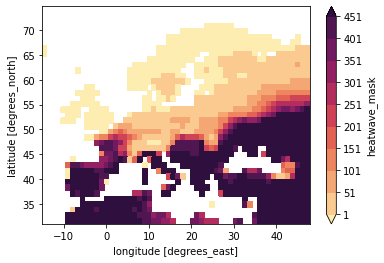

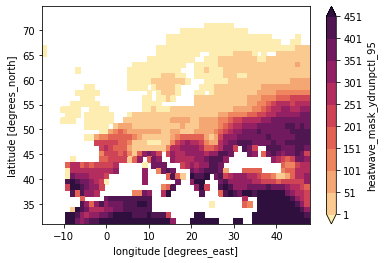

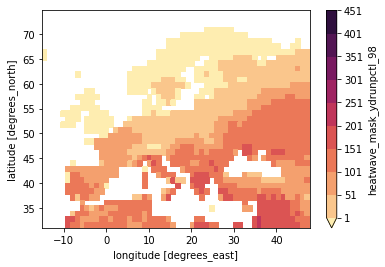

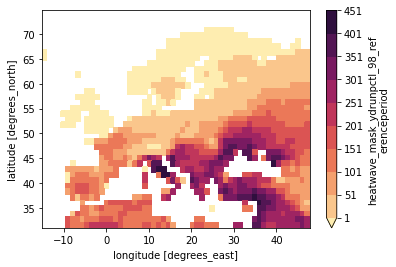

In [21]:
for var in ['heatwave_mask','heatwave_mask_ydrunpctl_95', 'heatwave_mask_ydrunpctl_98', 'heatwave_mask_ydrunpctl_98_referenceperiod'] :
    plt.figure()
    import numpy as np
    data[var].sum('time').where(data.mask_land).plot(levels = np.arange(1,500,50), cmap = 'cmo.matter')

In [200]:
# calculate mask based on the 30 day running mean percentile data calculated by cdo ydrunpctl
data['t2m_mask_stddev'] = data.t2m_mask_quantiles * 0
mean = xr.open_dataset('/data/user/nniebaum/europe_full_daymean_1900-01-01_2010-12-31.nc')
stddev = xr.open_dataset('/data/user/nniebaum/europe_full_daystd_1900-01-01_2010-12-31.nc')
# multiplication_stddev = [1.65,2,2.32]   
# idx = 0
# for quantile in data.t2m_mask_quantiles.coords['quantile'].values :
    
#     mean.t2m + multiplication_stddev[idx] * stddev.t2m


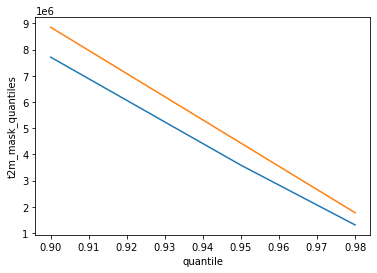

In [18]:
data.t2m_mask_ydrunpctl.sum({'time','latitude', 'longitude'}).plot()
data.t2m_mask_quantiles.sum({'time','latitude', 'longitude'}).plot()
# data.t2m_mask_stddev.sum({'time','latitude', 'longitude'}).plot()


In [4]:
data.to_netcdf('/data/user/nniebaum/europe_full_daymax_masks_1900-01-01_2010-12-31.nc')

In [2]:
mask_cdo = data.t2m_mask_ydrunpctl.sel(quantile = 0.90).sel(time = slice("1900", "2010")).astype(bool)
mask_cdo = hwi.calc_heatwave_index(mask_cdo, duration = 3)
hwmid = hwi.hwmid_func(data.t2m.sel(time = slice("1900", "2010")), mask_cdo)

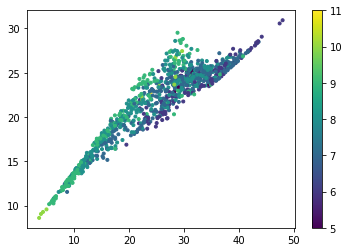

In [3]:
mask_cdo = mask_cdo & (hwmid >1)
timeslice = slice("2000-01-01", "2010-12-31")
plt.scatter(data.t2m.where(mask_cdo).mean({'longitude', 'latitude'}).sel(time = timeslice), data.swbgt.where(mask_cdo).mean({'longitude', 'latitude'}).sel(time = timeslice), c = (data.time.where(mask_cdo).mean({'longitude', 'latitude'}).sel(time = timeslice)).dt.month, marker = ".")
plt.colorbar()

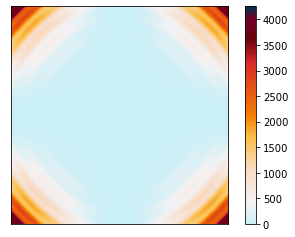

In [30]:
import numpy as np

x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = (np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)) * (x*y)
hex_list = ['#caf0f8', '#f5f3f4', '#f9dcc4', '#fcbf49', '#f77f00', '#d62828', '#6a040f', '#720026', '#003049']
cmap = pltfun.get_continuous_cmap(hex_list, float_list=[0, 0.1, 0.25,0.4, 0.5, 0.75, 0.85, 0.95, 1])
fig, ax = plt.subplots(1,1)
im = ax.imshow(z, cmap=cmap)
fig.colorbar(im)
ax.yaxis.set_major_locator(plt.NullLocator()) # remove y axis ticks
ax.xaxis.set_major_locator(plt.NullLocator()) # remove x axis ticks

    

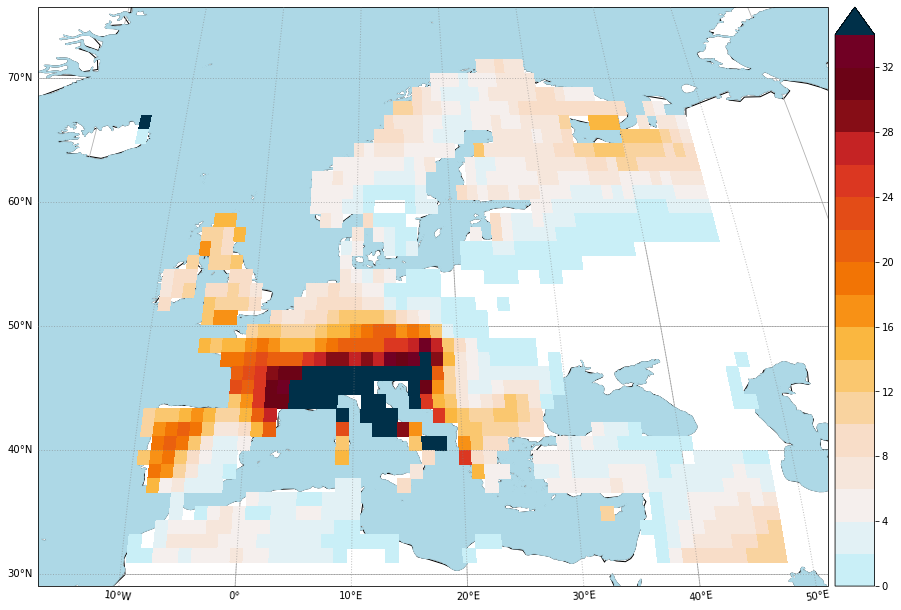

In [20]:
hex_list = ['#caf0f8', '#f5f3f4', '#f9dcc4', '#fcbf49', '#f77f00', '#d62828', '#6a040f', '#720026', '#003049']
cmap = pltfun.get_continuous_cmap(hex_list, float_list=[0, 0.1, 0.25,0.4, 0.5, 0.75, 0.85, 0.95, 1])

plot_data = (hwmid.where(mc.mask_land(hwmid)).sel(time = slice("2003-01", "2003-12")).sum("time", min_count = 1))
# help(pltfun.area_plot)
import cartopy.crs as ccrs
fig = plt.figure(figsize = (15,16))
ax = fig.add_subplot(111,  projection=ccrs.EckertV(central_longitude=12.5))
pm,ct = pltfun.area_plot(data = plot_data, ax = ax, levels = np.arange(0,36,2), cmap = cmap)
# pltfun.add_cbar(fig = fig, ax = ax, mapple_object=pm, extend = "max", percentage="2%")

In [36]:
cmap